<a href="https://colab.research.google.com/github/nestorm94/IA_2023_1/blob/main/Taller_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Darwin Martinez
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial 
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Estudiante:</b></i>  Luis Torres.
<br>
<i><b>Estudiante:</b></i> Santiago Sandoval.

<i><b>Tema:</b></i> Taller 2 corte 2
<br>
<br>
22/04/2023
<br>
</FONT>
</div>

Cree una función que realice la regresión lineal para un conjunto de puntos:

*   Cree una función que genere un conjunto de puntos para la regresión lineal, la función debe recibir como parámetro el numero de dimensiones de las variables independientes (por defecto 1) y retornar el valor de la variable dependiente.
*   Cree un conjunto de datos para la prueba del método de regresión, para una sola variable independiente.
*   Implemente una función de costo (MSE, MAE o RMSE)
*   Cree una función de regresión que reciba como parámetros el array con la variable dependiente y el de variables independientes y retorne los coeficientes de la recta que mejor se ajusta a los datos (array theta subíndice 0 y theta subíndice 1)
*   Cree una función que le permita visualizar los puntos de la regresión y la recta obtenida.
*   Visualice la función de costo. 
*   Cree una función que retorne las curvas de nivel de la función de costo
*   Cree una función que implementa el algoritmo de gradiente descendiente, la funcion recibe un conjunto de puntos y retorna una lista con los parámetros theta subíndice 0 y theta subíndice 1 obtenidos en cada iteración del algoritmo.
*   Agregue a la visualización de las curvas de nivel los puntos de los coeficientes de la recta de regresión utilizando el método de gradiente en descendiente
*   Genere un conjunto de para regresión (con una sola variable) utilizando el método make_regression de Sklearn

* Sobre ese conjunto de datos realice la regresión utilizando su implementación de gradiente en descendiente

* Compare los resultados obtenidos con su implementación con los entregados por la clase SGDRegressor de Sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
num_points =100
num_dimensiones = 1

In [ ]:

def generate_linear_data(num_points, num_dimensiones):

    X = np.random.rand(num_points, num_dimensiones)
    theta = np.array([[1], [2]]) # recta y = theta_0 + theta_1*x
    y = np.dot(np.concatenate((X, np.ones((num_points,num_dimensiones))), axis=1), theta)
    
    return X, y, theta


In [ ]:
def regresion_lineal(X, y):
    # Crear el modelo de regresión lineal
    reg = LinearRegression().fit(X, y)
    return reg

In [ ]:
X, y,theta = generate_linear_data(num_points,num_dimensiones)
modelo_regresion = regresion_lineal(X, y)

In [ ]:
def mse(X, y, modelo_regresion):
    # Calcular las predicciones del modelo
    y_pred = modelo_regresion.predict(X)
    # Calcular el MSE
    mse = np.mean((y_pred - y)**2)
    return mse


In [ ]:
mse_valor = mse(X, y, modelo_regresion)
print(mse_valor)

9.269115636346888e-32


In [ ]:
def mae(X, y, modelo_regresion):
    # Calcular las predicciones del modelo
    y_pred = modelo_regresion.predict(X)
    
    # Calcular el MAE
    mae = np.mean(np.abs(y_pred - y))
    
    return mae


In [ ]:
def rmse(X, y, modelo_regresion):
    # Calcular las predicciones del modelo
    y_pred = modelo_regresion.predict(X)
    
    # Calcular el MSE
    mse = np.mean((y_pred - y)**2)
    
    # Calcular el RMSE
    rmse = np.sqrt(mse)
    
    return rmse


In [ ]:

mse_valor = mse(X, y, modelo_regresion)
mae_valor = mae(X, y, modelo_regresion)
rmse_valor = rmse(X, y, modelo_regresion)


In [ ]:
def visualizar_resultados(mse_valor, mae_valor, rmse_valor):
    # Crear un gráfico de barras
    etiquetas = ['MSE', 'MAE', 'RMSE']
    valores = [mse_valor, mae_valor, rmse_valor]
    plt.bar(etiquetas, valores)
    
    # Agregar etiquetas y título
    plt.xlabel('Función de costo')
    plt.ylabel('Valor')
    plt.title('Resultados de la regresión lineal')
    
    # Mostrar el gráfico
    plt.show()


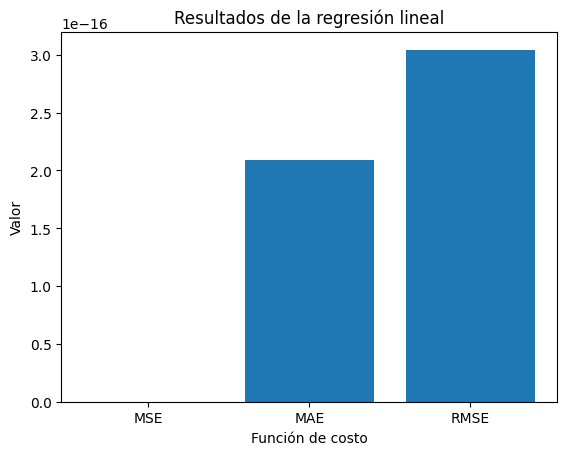

In [ ]:
visualizar_resultados(mse_valor, mae_valor, rmse_valor)


In [ ]:
def visualizar_regresion(x, y, theta):
    """
    Visualiza los puntos de la regresión y la recta obtenida.

    Parámetros:
    - x (ndarray): matriz de tamaño (m, n_dim) con los valores de las variables independientes.
    - y (ndarray): matriz de tamaño (m, 1) con los valores de la variable dependiente.
    - theta (ndarray): matriz de tamaño (n_dim+1, 1) con los coeficientes de la recta obtenida.
    """

    # Graficar los puntos de la regresión
    plt.scatter(x[:,0], y)
    plt.xlabel('Variable independiente')
    plt.ylabel('Variable dependiente')

    # Graficar la recta obtenida
    x_min = np.min(x[:,0])
    x_max = np.max(x[:,0])
    y_min = theta[0] + theta[1]*x_min
    y_max = theta[0] + theta[1]*x_max
    plt.plot([x_min, x_max], [y_min, y_max], color='red')

    plt.show()


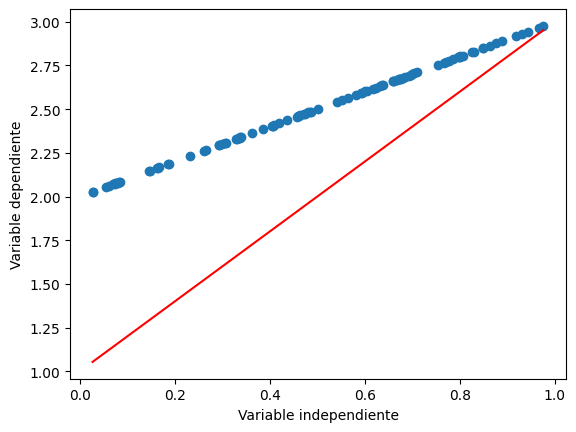

In [ ]:
visualizar_regresion(X, y, theta)

In [ ]:

def visualizar_funcion_costo(X, y):
    """
    Visualiza la función de costo para la regresión lineal.

    Parámetros:
    - x (ndarray): matriz de tamaño (m, n_dim) con los valores de las variables independientes.
    - y (ndarray): matriz de tamaño (m, 1) con los valores de la variable dependiente.
    """

    # Definir un rango de valores para los coeficientes de la recta
  
    theta0_vals = np.linspace(-10, 10, num_points)
    theta1_vals = np.linspace(-1, 4, num_points)

    # Inicializar la matriz de costos con ceros
    J_vals = np.zeros((num_points, num_points))

    # Calcular la función de costo para cada par de coeficientes de la recta
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            theta = np.array([[theta0], [theta1]])
            h = np.dot(np.concatenate((X, np.ones((num_points,1))), axis=1), theta)
            J_vals[i,j] = np.sum((h - y)**2) / (2*num_points)

    # Graficar la función de costo en un mapa de calor
    plt.contourf(theta0_vals, theta1_vals, J_vals.T, levels=50, cmap='jet')
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.colorbar()

    plt.show()


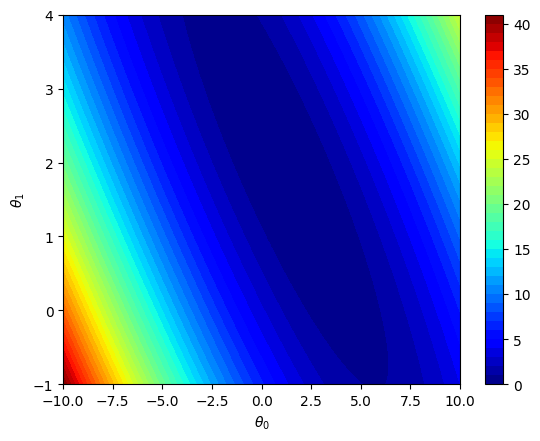

In [ ]:

# Visualizar la función de costo
visualizar_funcion_costo(X, y)


In [ ]:
#definimos la funcion de costo
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    J = 1/(2*m) * np.sum((h - y)**2)
    return J


In [ ]:
def curvas_nivel(X, y):
  theta0_vals = np.linspace(-10, 10, 100)
  theta1_vals = np.linspace(-1, 4, 100)

  J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

  for i, theta0 in enumerate(theta0_vals):
      for j, theta1 in enumerate(theta1_vals):
          theta = np.array([theta0, theta1])
          J_vals[i, j] = compute_cost(np.insert(X, 0, 1, axis=1), y, theta)

  # Graficar las curvas de nivel
  plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
  plt.xlabel('theta0')
  plt.ylabel('theta1')
  plt.scatter(modelo_regresion.intercept_, modelo_regresion.coef_, marker='x', color='red')
  plt.show()

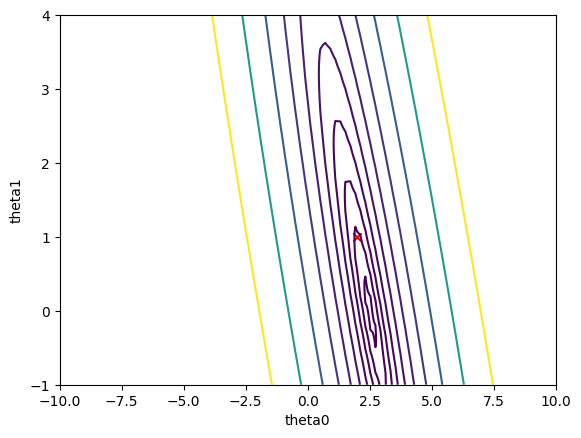

In [ ]:
curvas_nivel(X, y)

In [ ]:
def gradiente_descendiente(x, y, alpha=0.01, iteraciones=1000):

    # Inicializar los parámetros theta con ceros
    n_dim = x.shape[1]
    theta = np.zeros((n_dim+1, 1))

    # Agregar una columna de unos a la matriz x
    x = np.concatenate((x, np.ones((num_points,1))), axis=1)

    # Inicializar la lista de parámetros theta obtenidos en cada iteración
    theta_hist = [theta]

    # Implementar el algoritmo de gradiente descendiente
    for i in range(iteraciones):
        h = np.dot(x, theta)
        theta = theta - alpha*np.dot(x.T, h-y) / num_points
        theta_hist.append(theta)

    return theta_hist


Coeficientes de la recta obtenidos: [[1.03248587]
 [1.98258812]]


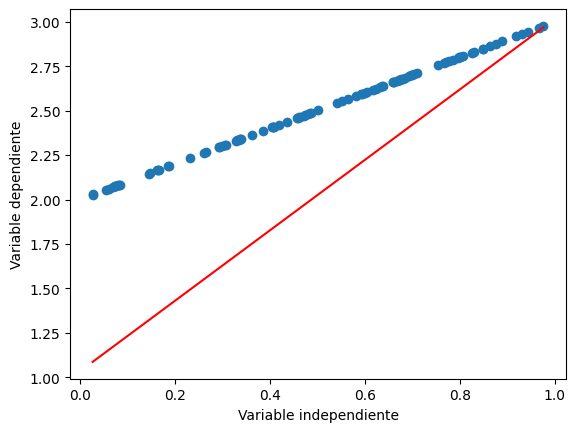

In [ ]:
# Aplicar el algoritmo de gradiente descendiente
theta_hist = gradiente_descendiente(X, y, alpha=0.01, iteraciones=1000)

# Imprimir los coeficientes de la recta obtenidos
print('Coeficientes de la recta obtenidos:', theta_hist[-1])

# Visualizar los puntos de la regresión y la recta obtenida
visualizar_regresion(X, y, theta_hist[-1])

In [ ]:
def curvas_nivel(x, y, theta_hist=None):
    # Definir un rango de valores para los coeficientes de la recta
    
    theta0_vals = np.linspace(-10, 10, num_points)
    theta1_vals = np.linspace(-1, 4, num_points)

    # Inicializar la matriz de costos con ceros
    J_vals = np.zeros((num_points, num_points))

    # Calcular la función de costo para cada par de coeficientes de la recta
    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            theta = np.array([[theta0], [theta1]])
            h = np.dot(np.concatenate((x, np.ones((num_points,1))), axis=1), theta)
            J_vals[i,j] = np.sum((h - y)**2) / (2*num_points)

    # Graficar las curvas de nivel
    plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')

    # Graficar los puntos de los coeficientes de la recta obtenidos con el método de gradiente descendiente
    if theta_hist is not None:
        theta_hist = np.array(theta_hist)
        plt.plot(theta_hist[:,0], theta_hist[:,1], 'rx-')

    plt.show()


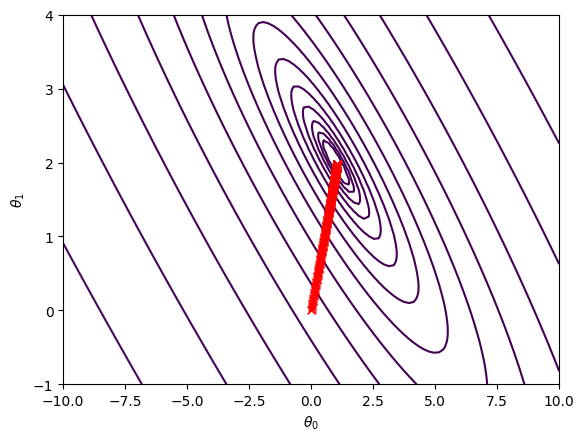

In [ ]:
# Aplicar el algoritmo de gradiente descendiente
theta_hist = gradiente_descendiente(X, y, alpha=0.01, iteraciones=1000)

# Visualizar las curvas de nivel y los puntos de los coeficientes de la recta obtenidos
curvas_nivel(X, y, theta_hist)

In [ ]:
from sklearn.datasets import make_regression

# Generar un conjunto de datos para la regresión con una sola variable
m = 100
X1, y1 = make_regression(num_points,n_features=10,n_informative=10,n_targets=1)


Coeficientes de la recta obtenidos: [[-7.67283955e-03 -4.47857651e-02  9.51119617e-02 ...  1.60798679e-01
  -3.54916344e-02  6.06908777e-02]
 [ 1.11333864e-02  6.49847069e-02 -1.38008649e-01 ... -2.33320900e-01
   5.14988067e-02 -8.80632247e-02]
 [ 5.03187581e-03  2.93706661e-02 -6.23747671e-02 ... -1.05452353e-01
   2.32755417e-02 -3.98012962e-02]
 ...
 [ 9.99424612e-03  5.83356339e-02 -1.23887949e-01 ... -2.09448088e-01
   4.62295774e-02 -7.90528154e-02]
 [ 1.32118032e-02  7.71162634e-02 -1.63772553e-01 ... -2.76878005e-01
   6.11127715e-02 -1.04503154e-01]
 [-2.63591579e+01 -1.53856346e+02  3.26746207e+02 ...  5.52405371e+02
  -1.21927429e+02  2.08496531e+02]]


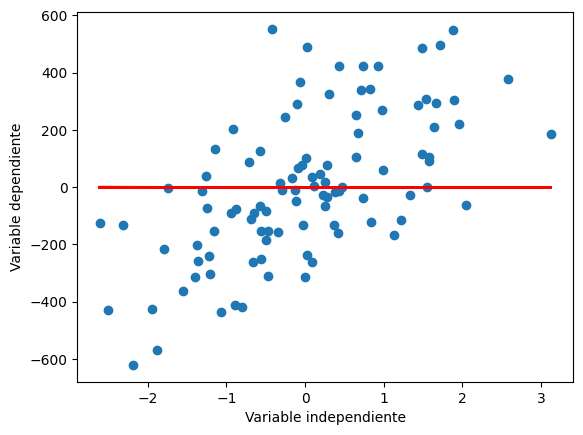

In [ ]:
# Aplicar el algoritmo de gradiente descendiente
theta_hist = gradiente_descendiente(X1, y1 , alpha=0.01, iteraciones=1000)

# Imprimir los coeficientes de la recta obtenidos
print('Coeficientes de la recta obtenidos:', theta_hist[-1])

# Visualizar los puntos de la regresión y la recta obtenida
visualizar_regresion(X1, y1, theta_hist[-1])


Coeficientes de la recta obtenidos con SGDRegressor: [0.16931368454801798, 97.09765031307104]


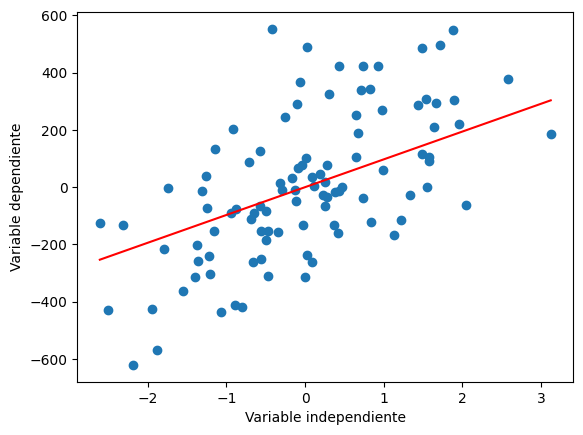

In [ ]:
from sklearn.linear_model import SGDRegressor

# Crear un objeto SGDRegressor
sgd_reg = SGDRegressor(alpha=0.01, max_iter=1000, tol=1e-3, random_state=0)

# Ajustar el modelo a los datos
sgd_reg.fit(X1, y1,)

# Imprimir los coeficientes de la recta obtenidos
print('Coeficientes de la recta obtenidos con SGDRegressor:', [sgd_reg.intercept_[0], sgd_reg.coef_[0]])

# Visualizar los puntos de la regresión y la recta obtenida
visualizar_regresion(X1, y1, [sgd_reg.intercept_[0], sgd_reg.coef_[0]])


In [ ]:
# Imprimir los coeficientes de la recta obtenidos por nuestra implementación
print('Coeficientes de la recta obtenidos con nuestra implementación:', theta_hist[-1])

# Comparar los coeficientes de la recta obtenidos

print('Diferencia en los coeficientes de la recta:', np.abs(theta_hist[-1,:] - [sgd_reg.intercept_[0], sgd_reg.coef_[0]]))


Coeficientes de la recta obtenidos con nuestra implementación: [[-7.67283955e-03 -4.47857651e-02  9.51119617e-02 ...  1.60798679e-01
  -3.54916344e-02  6.06908777e-02]
 [ 1.11333864e-02  6.49847069e-02 -1.38008649e-01 ... -2.33320900e-01
   5.14988067e-02 -8.80632247e-02]
 [ 5.03187581e-03  2.93706661e-02 -6.23747671e-02 ... -1.05452353e-01
   2.32755417e-02 -3.98012962e-02]
 ...
 [ 9.99424612e-03  5.83356339e-02 -1.23887949e-01 ... -2.09448088e-01
   4.62295774e-02 -7.90528154e-02]
 [ 1.32118032e-02  7.71162634e-02 -1.63772553e-01 ... -2.76878005e-01
   6.11127715e-02 -1.04503154e-01]
 [-2.63591579e+01 -1.53856346e+02  3.26746207e+02 ...  5.52405371e+02
  -1.21927429e+02  2.08496531e+02]]


TypeError: ignored